## Études des valeurs foncières de 2017 à 2022

### Sommaires

A. Présentation du projet

    1. Introduction
    
    2. Objectifs

    3. Etapes du projet

B. Réalisation du projet

    1. Importation des données

    2. Nettoyage / Analyse des données

    3. Visualisation des données

    4. Identification des variables susceptibles d’être utilisées dans la prévision des prix de l’immobilier

    5. Réalisation d’un modèle prédictif des prix de l’immobilier 

C. Conclusion

### A. Présentation du projet 

#### 1. Introduction

Dans ce document, nous allons analyser le jeux de données des valeurs foncières française de 2017 à 2022. 

Le jeux de données est disponible sur  https://www.data.gouv.fr/fr/datasets/5c4ae55a634f4117716d5656/. Ou dans les fichiers du projet ( valeursfoncieres-2018.txt, valeursfoncieres-2019.txt, valeursfoncieres-2020.txt, valeursfoncieres-2021.txt)

Ce jeux de données contient les informations sur les ventes de biens immobiliers en France.

#### 2. Objectifs

Les objectifs de ce projet sont les suivants :

- Analyser l’impact de la crise sanitaire sur le marché immobilier français, par région et département.

- Identifier les variables susceptibles d’être utilisées dans la prévision des prix de l’immobilier. 

- Réaliser un modèle prédictif des prix de l’immobilier et en analyser la performance (optionnel / bonus). 

#### 3. Etapes du projet

Les étapes du projet sont les suivantes :

- Importation des données
- Nettoyage / Analyse des données
- Visualisation des données
- Identification des variables susceptibles d’être utilisées dans la prévision des prix de l’immobilier
- Réalisation d’un modèle prédictif des prix de l’immobilier 


### B. Réalisation du projet

#### 1. Importation des données

In [2]:
# importer pandas
import pandas as pd
import numpy as np


def load_data():
    data_2017 = pd.read_csv('valeursfoncieres-2017-s2.txt', header= 0, sep='|')
    data_2018 = pd.read_csv('valeursfoncieres-2018.txt', header= 0, sep='|')
    data_2019 = pd.read_csv('valeursfoncieres-2019.txt', header= 0, sep='|')
    data_2020 = pd.read_csv('valeursfoncieres-2020.txt', header= 0, sep='|')
    data_2021 = pd.read_csv('valeursfoncieres-2021.txt', header= 0, sep='|')
    data_2022 = pd.read_csv('valeursfoncieres-2022-s1.txt', header= 0, sep='|')
    return data_2017, data_2018, data_2019, data_2020, data_2021, data_2022

data_2017, data_2018, data_2019, data_2020, data_2021, data_2022 = load_data()

C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/2273737061.py:15: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  data_2017, data_2018, data_2019, data_2020, data_2021, data_2022 = load_data()
C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/2273737061.py:15: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  data_2017, data_2018, data_2019, data_2020, data_2021, data_2022 = load_data()
C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/2273737061.py:15: DtypeWarning: Columns (14,18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  data_2017, data_2018, data_2019, data_2020, data_2021, data_2022 = load_data()
C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/2273737061.py:15: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types.Specify dtype option on import or set l

In [3]:
# On affiche la quantité de données par année
data_2017.shape, data_2018.shape, data_2019.shape, data_2020.shape, data_2021.shape, data_2022.shape

((1764631, 43),
 (3334823, 43),
 (3623957, 43),
 (3509085, 43),
 (4375223, 43),
 (1429093, 43))

#### 2. Nettoyage / Analyse des données

On analyse les données pour voir si elles sont propres et si elles sont utilisables.

Dans un premier temps, on vérifie les en-têtes des fichiers pour voir si les colonnes sont bien nommées. Et que les différents datasets sont bien identiques.

In [4]:
print("2017 head", data_2017.head(0))
print("2018 head", data_2018.head(0))
print("2019 head", data_2019.head(0))
print("2020 head", data_2020.head(0))
print("2021 head", data_2021.head(0))
print("2022 head", data_2022.head(0))

2017 head Empty DataFrame
Columns: [Code service sages, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, B/T/Q, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Prefixe de section, Section, No plan, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Nombre de lots, Code type local, Type local, Identifiant local, Surface reelle bati, Nombre pieces principales, Nature culture, Nature culture speciale, Surface terrain]
Index: []

[0 rows x 43 columns]
2018 head Empty DataFrame
Columns: [Code service sages, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, B/T/Q, T

Puis, on va assemble les jeux de données en un seul dataset. Pour cela, on va utiliser la fonction concat de pandas.

In [5]:
cols_to_drop = ['Code service sages', 'Reference document', '1 Articles CGI', '2 Articles CGI', 
                '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'B/T/Q', 'Prefixe de section', 
                'Section', 'No plan', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 
                'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 
                'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 
                'Identifiant local',
                'Nature culture speciale']

liste_data_sets = [data_2017, data_2018, data_2019, data_2020, data_2021, data_2022]
new_data_sets = []

for item in liste_data_sets:
    new_data_sets.append(item.drop(cols_to_drop, axis=1))
    
combined_data = pd.concat(new_data_sets, axis=0)
combined_data = combined_data.reset_index(drop=True)

In [6]:
# On vérifie que les donnée sont bien assemblé
print(combined_data.head(0), combined_data.shape)
print(combined_data['Code postal'][2])
print(data_2017['Code postal'][2])
print(data_2018['Code postal'][2])
print(data_2019['Code postal'][2])
print(data_2020['Code postal'][2])

Empty DataFrame
Columns: [No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Nombre de lots, Code type local, Type local, Surface reelle bati, Nombre pieces principales, Nature culture, Surface terrain]
Index: [] (18036812, 19)
1000.0
1000.0
1250.0
1000.0
1290.0


Analysons les colonnes du dataset pour voir si elles sont bien nommées, si elles sont utilisables et les analyser


```
Code service sages, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, B/T/Q, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Prefixe de section, Section, No plan, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Nombre de lots, Code type local, Type local, Identifiant local, Surface reelle bati, Nombre pieces principales, Nature culture, Nature culture speciale, Surface terrain
```

On remarque que les colonnes sont bien nommées. On peut donc les utiliser.

On va maintenant vérifier si les données sont utilisables. Pour cela, on va regarder si il y a des valeurs manquantes dans le dataset.


In [8]:
# Vérifier les valeurs manquantes
print(combined_data.isnull().sum())

No disposition                     0
Date mutation                      0
Nature mutation                    0
Valeur fonciere               190335
No voie                      7060834
Type de voie                 7379940
Code voie                     161319
Voie                          161688
Code postal                   162210
Commune                            0
Code departement                   0
Code commune                       0
Nombre de lots                     0
Code type local              7800007
Type local                   7800007
Surface reelle bati          7812489
Nombre pieces principales    7812489
Nature culture               5760817
Surface terrain              5760817
dtype: int64


On peut voir que les colonnes suivantes ont des valeurs manquantes :

```
Code service sages, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, B/T/Q, Prefixe de section, Section, No plan, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Nombre de lots, Identifiant local, Surface reelle bati, Nombre pieces principales, Nature culture, Nature culture speciale, Surface terrain
```

On va supprimer les colonnes qui ont trop de valeurs manquantes. Pour cela, on va utiliser la fonction drop() de pandas.

In [36]:
data = combined_data

In [8]:
# Affiche le header dataframe
print(data.head())

   No disposition Date mutation        Nature mutation Valeur fonciere  \
0               1    04/07/2017                  Vente       166100,00   
1               1    06/07/2017                  Vente        59000,00   
2               1    06/07/2017                  Vente        59000,00   
3               1    07/07/2017  Vente terrain à bâtir        55000,00   
4               1    06/07/2017                  Vente       130000,00   

   No voie Type de voie Code voie                 Voie  Code postal  \
0    843.0          RUE      0100       DE LA CHARPINE       1000.0   
1      2.0          RUE      1720               GOUNOD       1000.0   
2      2.0          RUE      1720               GOUNOD       1000.0   
3      NaN          NaN      B033        LA MAGDELEINE       1160.0   
4      NaN          NaN      B148  HAMEAU DU CREUX EST       1750.0   

                 Commune Code departement  Code commune  Nombre de lots  \
0  SAINT-DENIS-LES-BOURG                1           3

Voici les colonnes qu'il va nous rester :


```
[No disposition, Date mutation, Nature mutation, Valeur fonciere, No voie, Type de voie, Code voie, Voie, Code postal, Commune, Code departement, Code commune, Code type local, Type local]
```

On va maintenant vérifier si il y a des valeurs aberrantes dans le dataset. Pour cela, on va utiliser la fonction describe() de pandas.

In [13]:
print(data.describe())

       No disposition       No voie   Code postal  Code commune  \
count    1.803681e+07  1.097598e+07  1.787460e+07  1.803681e+07   
mean     1.255765e+00  7.529121e+02  5.053652e+04  2.078398e+02   
std      8.413373e+00  2.077491e+03  2.740544e+04  1.673717e+02   
min      1.000000e+00  1.000000e+00  1.000000e+03  1.000000e+00   
25%      1.000000e+00  8.000000e+00  2.929000e+04  7.300000e+01   
50%      1.000000e+00  2.500000e+01  4.926000e+04  1.720000e+02   
75%      1.000000e+00  1.010000e+02  7.501500e+04  2.970000e+02   
max      1.246000e+03  9.999000e+03  9.749000e+04  9.090000e+02   

       Nombre de lots  Code type local  Surface reelle bati  \
count    1.803681e+07     1.023680e+07         1.022432e+07   
mean     4.162840e-01     2.102174e+00         7.926783e+01   
std      8.480126e-01     9.435012e-01         8.843054e+02   
min      0.000000e+00     1.000000e+00         0.000000e+00   
25%      0.000000e+00     1.000000e+00         0.000000e+00   
50%      0.000000e

On remarque qu'il manque la colonne Valeur fonciere dans le describe(). C'est normal, car cette colonne est de type object. On va donc la convertir en float.

In [9]:
data['Valeur fonciere'] = data['Valeur fonciere'].str.replace(',', '.').astype(float)

print(data[['Valeur fonciere']].describe())

       Valeur fonciere
count     1.784648e+07
mean      1.212178e+06
std       1.186536e+07
min       1.000000e-02
25%       6.500000e+04
50%       1.550000e+05
75%       2.820000e+05
max       2.086000e+09


On va convertir la date mutation en format datetime et extraire l'année de la date.

In [10]:
data['Date mutation'] = pd.to_datetime(data['Date mutation'], format='%d/%m/%Y')

# Extraire l'année de chaque transaction
data['Annee'] = data['Date mutation'].dt.year

In [11]:
# On vérifie le dataset
print(data.head())

print(data.shape)

   No disposition Date mutation        Nature mutation  Valeur fonciere  \
0               1    2017-07-04                  Vente         166100.0   
1               1    2017-07-06                  Vente          59000.0   
2               1    2017-07-06                  Vente          59000.0   
3               1    2017-07-07  Vente terrain à bâtir          55000.0   
4               1    2017-07-06                  Vente         130000.0   

   No voie Type de voie Code voie                 Voie  Code postal  \
0    843.0          RUE      0100       DE LA CHARPINE       1000.0   
1      2.0          RUE      1720               GOUNOD       1000.0   
2      2.0          RUE      1720               GOUNOD       1000.0   
3      NaN          NaN      B033        LA MAGDELEINE       1160.0   
4      NaN          NaN      B148  HAMEAU DU CREUX EST       1750.0   

                 Commune Code departement  Code commune  Nombre de lots  \
0  SAINT-DENIS-LES-BOURG                1      


On va récupérer les coordonnées "lattitude" "longitude" de chaque transaction à partir du code postal. 

Pour cela, on va utiliser la librairie geopy. 

In [26]:
from geopy.geocoders import Nominatim

# créer un objet Geocoder pour effectuer des requêtes de géocodage
geolocator = Nominatim(user_agent="my_app")

# fonction pour récupérer les coordonnées d'une commune à partir de son code postal
def get_coordinates_from_postal_code(postal_code):
    location = geolocator.geocode({"postalcode": postal_code, "country": "France"})
    if location is not None:
        return str(location.latitude) + ',' + str(location.longitude)
    else:
        return '0,0'

# exemple d'utilisation
# print(get_coordinates_from_postal_code("75001"))  # affiche les coordonnées géographiques du 1er arrondissement de Paris

## Il y a une limite des serveurs de la librairie geopy  afin de pouvoir récupérer les coordonnés avec la fonction get_coordinates_from_postal_code

# Pour contrer le problème, on va le faire étape par étape et enrengistrer les données dans un fichier csv.
# Afin de pouvoir travailler dessus plus rapidement
# data['coordinates'].fillna('0, 0')

# data['coordinates'] = data.iloc[:20]['Code postal'].apply(get_coordinates_from_postal_code)
# data[['latitude', 'longitude']] = pd.DataFrame(data['coordinates'].tolist(), index=data.index)

# print(data.describe())

La solution essayer au dessus ne fonctionne pas sur un grand jeu de données pour des raisons de serveurs.

Afin de countourner le problème, on va plutot se servir d'un jeu de donnée venant de data.gouv.fr afin d'ajouter la géolocalisation au donnée immobilière: https://www.data.gouv.fr/fr/datasets/communes-de-france-base-des-codes-postaux/

Voir le fichier "communes-departement-region.csv" dans le projet.

In [81]:
# le set de data entier n'autorise pas un run optimal, on laisse ici la possibilité de rétrecir le dataset pour pour le
# lancer facilement et rapidement

data_temp = data
data = data_temp.sample(500000)

In [82]:
data_postal = pd.read_csv('communes-departement-region.csv', header= 0, sep=',')
data_postal = data_postal.rename(columns={'code_postal': 'Code postal'})

cols_to_drop = ['libelle_acheminement','ligne_5','article','nom_commune','nom_commune_complet']
data_postal = data_postal.drop(cols_to_drop, axis=1)

data['Code postal'] = data['Code postal'].fillna(-1).astype('string')
data_postal['code_commune_INSEE'] = data_postal['code_commune_INSEE'].fillna(-1).astype('string')
data['Code postal'] = data['Code postal'].astype(str)

In [83]:
print(data.shape)
print(data_postal.shape)

(500000, 20)
(39201, 10)


In [84]:
# on convertit les deux colonnes pour pouvoir être en mesure de les fusionner après

data['Code postal'] = data['Code postal'].astype(float)
data_postal['Code postal'] = data_postal['Code postal'].astype(float)

In [85]:
merged_data = pd.merge(data, data_postal, left_on=['Commune'], right_on=['nom_commune_postal'], how='inner')
merged_data.reset_index(drop=True)

print(merged_data.shape)

(594678, 30)


In [112]:
merged_data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal_x,Commune,...,code_commune_INSEE,nom_commune_postal,Code postal_y,latitude,longitude,code_commune,code_departement,nom_departement,code_region,nom_region
0,1,2018-03-09,Vente,195000.0,NaN,NaN,B046,LE VILLAGE,62130.0,HUMIERES,...,62468,HUMIERES,62130.0,50.384859,2.208269,468.0,62,Pas-de-Calais,32.0,Hauts-de-France
1,1,2017-07-20,Vente,106850.0,NaN,NaN,B046,LE VILLAGE,62130.0,HUMIERES,...,62468,HUMIERES,62130.0,50.384859,2.208269,468.0,62,Pas-de-Calais,32.0,Hauts-de-France
2,1,2021-11-02,Vente,100000.0,12.0,NaN,C909,LA RIVE,22260.0,QUEMPER GUEZENNEC,...,22256,QUEMPER GUEZENNEC,22260.0,48.700644,-3.108323,256.0,22,Côtes-d'Armor,53.0,Bretagne
3,1,2021-12-01,Vente,250000.0,NaN,NaN,B210,AR LIORS,22260.0,QUEMPER GUEZENNEC,...,22256,QUEMPER GUEZENNEC,22260.0,48.700644,-3.108323,256.0,22,Côtes-d'Armor,53.0,Bretagne
4,1,2021-07-09,Vente,106561.9,NaN,NaN,B322,AR VENEC,22260.0,QUEMPER GUEZENNEC,...,22256,QUEMPER GUEZENNEC,22260.0,48.700644,-3.108323,256.0,22,Côtes-d'Armor,53.0,Bretagne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594673,1,2017-10-09,Vente,2430.0,NaN,NaN,B048,LE VILLAGE,51130.0,VILLESENEUX,...,51638,VILLESENEUX,51130.0,48.844204,4.143760,638.0,51,Marne,44.0,Grand Est
594674,1,2019-05-13,Vente,173400.0,NaN,NaN,B021,NARZILLERE,8130.0,GUINCOURT,...,8204,GUINCOURT,8130.0,49.556338,4.628134,204.0,8,Ardennes,44.0,Grand Est
594675,1,2018-01-12,Vente,120000.0,NaN,NaN,B044,LA HERMOINE,2140.0,VOULPAIX,...,2826,VOULPAIX,2140.0,49.838751,3.832662,826.0,2,Aisne,32.0,Hauts-de-France
594676,1,2020-10-29,Vente,110000.0,5063.0,NaN,B003,LE BOURG,76730.0,ROYVILLE,...,76546,ROYVILLE,76730.0,49.779225,0.953002,546.0,76,Seine-Maritime,28.0,Normandie


En assemblant les deux jeux de données, on obtient le dataset final de 18 036 812 de lignes.


On note qu'on a perdu presque la moitié des données. C'est normal, car on a supprimé les données qui n'avaient pas de code postal.

In [86]:
# On va afficher les valeurs uniques de chaque colonne succeptible d'être utile au trie des données
print("Nature Culture", data['Nature culture'].unique())
print("Type de voie", data['Type de voie'].unique())
print("Nature mutation", data['Nature mutation'].unique())
print("Type local", data['Type local'].unique())
print("Nombre pieces principales", data['Nombre pieces principales'].unique())

Nature Culture ['S' nan 'VE' 'T' 'AB' 'VI' 'P' 'J' 'BT' 'L' 'BP' 'B' 'AG' 'PP' 'PC' 'BR'
 'PH' 'BS' 'PA' 'E' 'LB' 'CA' 'BM' 'BF' 'CH' 'PE' 'BO' 'TP']
Type de voie [nan 'BD' 'RUE' 'AV' 'CHE' 'CC' 'GR' 'RTE' 'ALL' 'PL' 'RES' 'LOT' 'IMP'
 'QUAI' 'VC' 'SQ' 'CHEM' 'VOIE' 'CLOS' 'PROM' 'RLE' 'PAS' 'FG' 'TRA'
 'PORT' 'CRS' 'PLE' 'CITE' 'MTE' 'SEN' 'CAE' 'VLA' 'PTR' 'PARC' 'DOM'
 'GPL' 'CAR' 'COTE' 'MAIL' 'TSSE' 'ZAC' 'ESP' 'D' 'COR' 'VAL' 'CR' 'CHS'
 'HAM' 'VEN' 'QUA' 'GAL' 'REM' 'CALL' 'ART' 'HLM' 'CTRE' 'PCH' 'LEVE'
 'VCHE' 'PTE' 'PASS' 'RPT' 'COUR' 'DIG' 'PRV' 'CD' 'ROC' 'CAMI' 'VTE'
 'ACH' 'VGE' 'MAR' 'N' 'TOUR' 'PLA' 'ZA' 'CHL' 'DSC' 'ZONE' 'FRM' 'CPG'
 'RPE' 'CHV' 'CLR' 'ESPA' 'NTE' 'FOS' 'PRT' 'ZI' 'ENC' 'PLAN' 'VIL' 'CTR'
 'PTTE' 'CHT' 'PONT' 'CASR' 'PAE' 'MRN' 'LIGN' 'LICE' 'ILOT' 'ESC' 'PIST'
 'VIA' 'BRG' 'MAIS' 'VALL' 'CORO' 'RUIS' 'PLCI' 'DRA' 'JARD' 'ZAD' 'ZUP'
 'AUT' 'GARE' 'BRTL' 'RIVE' 'HAB' 'VOIR']
Nature mutation ['Vente' 'Vente terrain à bâtir' "Vente en l'état futur d'achè

Avant de filter les données, on va sauvegarder le dataset dans un fichier csv afin de pouvoir travailler dessus plus rapidement

In [87]:
data.to_csv('save_before_filter.csv', index=False)

In [97]:
data_saved = data

In [98]:
data = data_saved.head(10000)
# print(data)

In [99]:
print(data.shape)

# On va filtrer les données en fonction des données qui nous intéressent
data = data[((data['Nature mutation'] == 'Vente') | (data['Nature mutation'] == 'Maison'))  & ((data['Type local'] == 'Maison') | (data['Type local'] == "Dépendance"))]

print(data.shape)

(3573, 20)
(3573, 20)


In [100]:
# On ne va garder que les données avec une Surface reelle bati > 0
data = data[(data['Surface reelle bati'] > 0)]

print(data.shape)

(1956, 20)


On vient de réduire le Jeu de donnée de 9 407 003 lignes à 1 925 548. Ce qui enlève plus de  7,481,455 de transactions à notre analyse. ( 80 % du dataset déjà filter du aux positions )

On va ajouter une colonne "prix au m²" au dataset à partir de la colonne "Valeur fonciere" et de la colonne "Surface reelle bati". 

In [101]:
# afin de pouvoir calculer le m2 à partir de la valeur foncière divisée par la surface réelle bati
data['prix_m2'] = np.nan
data["prix_m2"] = data["Valeur fonciere"] / data['Surface reelle bati']

print(data.describe())

       No disposition  Valeur fonciere      No voie   Code postal  \
count     1956.000000     1.953000e+03  1949.000000   1956.000000   
mean         1.132413     6.804429e+05   873.426886  50420.571575   
std          4.074542     7.294128e+06  2040.297180  26379.924234   
min          1.000000     6.000000e+02     1.000000   1000.000000   
25%          1.000000     1.180000e+05     8.000000  29800.000000   
50%          1.000000     1.850000e+05    24.000000  50130.000000   
75%          1.000000     2.900000e+05   140.000000  76140.000000   
max        181.000000     2.206233e+08  9535.000000  97490.000000   

       Code commune  Nombre de lots  Code type local  Surface reelle bati  \
count   1956.000000     1956.000000           1956.0          1956.000000   
mean     228.163599        0.051636              1.0           103.886503   
std      178.222935        0.314837              0.0            47.134898   
min        1.000000        0.000000              1.0            10.000

Maintenant qu'on a réduit le Jeu de donnée et ajouter des données le jeu de donnée qu'on va utiliser, on va le sauvegarder dans un fichier csv pour ne pas avoir à le refaire à chaque fois.

In [102]:
# On va enrengistrer le jeu de donnnées dans un fichier csv
data.to_csv('save_after_filter.csv', index=False)

### 3. Visualisation des données

On  va récupérer les deux jeux de donnée sauvegarder précédemment afin de pouvoir les utiliser pour la visualisation.

In [103]:
import pandas as pd

data = pd.read_csv('save_after_filter.csv', header= 0, sep=',')
data_before_filter = pd.read_csv('save_before_filter.csv', header= 0, sep=',')
data_before_position = pd.read_csv('save_before_position.csv', header= 0, sep=',')

C:\Users\thiba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


On va utiliser un boxplot pour visualiser les Valeur foncieres en fonction de l'année sur les deux jeux de données pour voir si il y a une différence entre les deux jeux de données.

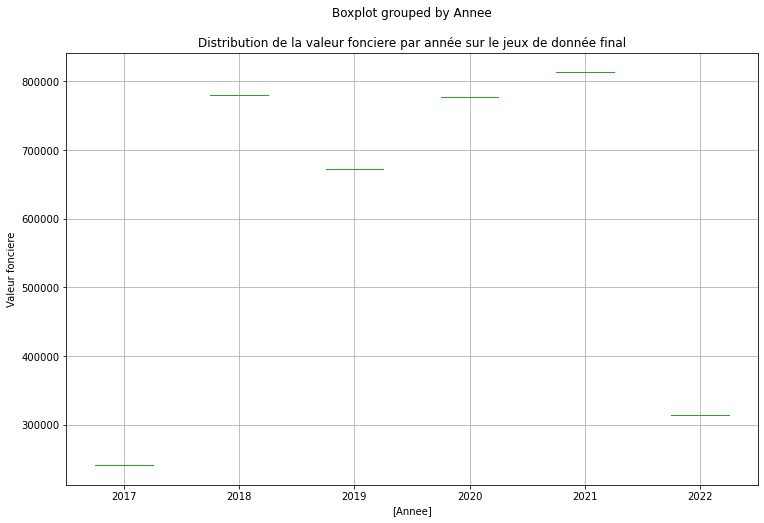

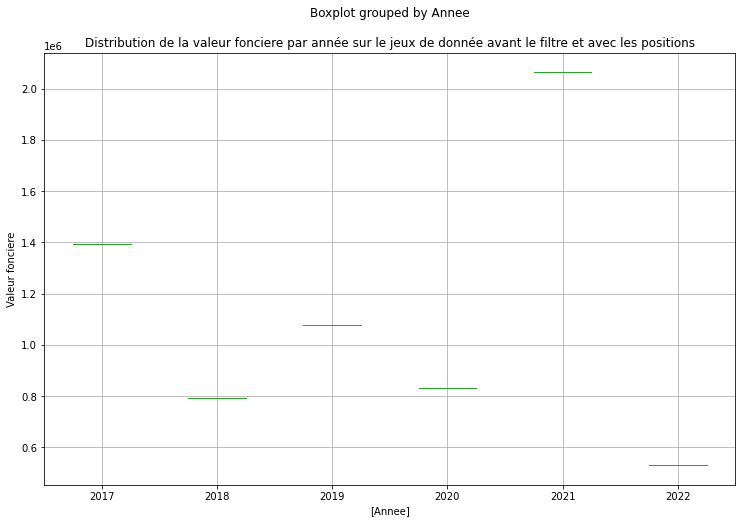

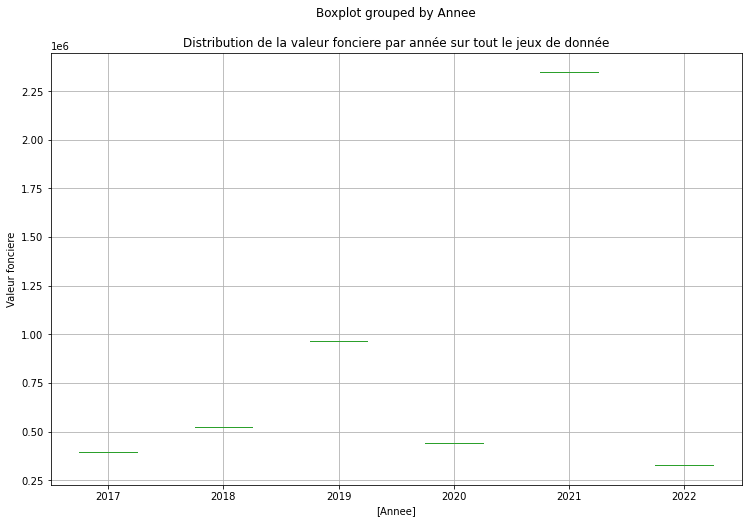

In [105]:
# Créer un graphique avec un boxplot pour chaque commune et année sur chaque jeu de donnée
import matplotlib.pyplot as plt

### data ###

# Grouper les données par année, et calculer la valeur foncière moyenne
data_annee = data.groupby(['Annee'])[['Valeur fonciere']].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
data_annee.boxplot(column='Valeur fonciere', by=['Annee'], ax=ax)
ax.set_ylabel('Valeur fonciere')
ax.set_title('Distribution de la valeur fonciere par année sur le jeux de donnée final')
plt.show()

### data_before_filter ###

# Grouper les données par année, et calculer la valeur foncière moyenne
data_annee_1 = data_before_filter.groupby(['Annee'])[['Valeur fonciere']].mean().reset_index()

# Créer un graphique avec un boxplot pour chaque commune et année

fig, ax = plt.subplots(figsize=(12, 8))
data_annee_1.boxplot(column='Valeur fonciere', by=['Annee'], ax=ax)
ax.set_ylabel('Valeur fonciere')
ax.set_title('Distribution de la valeur fonciere par année sur le jeux de donnée avant le filtre et avec les positions')
plt.show()


### data_before_position ###

# Grouper les données par année, et calculer la valeur foncière moyenne
data_annee_2 = data_before_position.groupby(['Annee'])[['Valeur fonciere']].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
data_annee_2.boxplot(column='Valeur fonciere', by=['Annee'], ax=ax)
ax.set_ylabel('Valeur fonciere')
ax.set_title('Distribution de la valeur fonciere par année sur tout le jeux de donnée')
plt.show()

On constate que les datasets sont un peu près hommogène, mais on remarque quand même que le dataset avec les données géolocalisées est un peu plus élevé que le dataset sans les données géolocalisées sur l'anné 2021.

In [166]:
data = merged_data[['Code postal_x', 'Commune', 'Valeur fonciere', 'latitude', 'longitude']].dropna()

In [167]:
data.shape

(586317, 5)

In [168]:
data

,Code postal_x,Commune,Valeur fonciere,latitude,longitude
0,62130.0,HUMIERES,195000.0,50.384859,2.208269
1,62130.0,HUMIERES,106850.0,50.384859,2.208269
2,22260.0,QUEMPER GUEZENNEC,100000.0,48.700644,-3.108323
3,22260.0,QUEMPER GUEZENNEC,250000.0,48.700644,-3.108323
4,22260.0,QUEMPER GUEZENNEC,106561.9,48.700644,-3.108323
...,...,...,...,...,...
594673,51130.0,VILLESENEUX,2430.0,48.844204,4.143760
594674,8130.0,GUINCOURT,173400.0,49.556338,4.628134
594675,2140.0,VOULPAIX,120000.0,49.838751,3.832662
594676,76730.0,ROYVILLE,110000.0,49.779225,0.953002


In [169]:
nan_counts = data.isna().sum()
print(nan_counts)

Code postal_x      0
Commune            0
Valeur fonciere    0
latitude           0
longitude          0
dtype: int64


In [170]:
data = data.head(100)

In [171]:
import folium
import pandas as pd

# Compute the radius of each circle marker based on the 'Valeur fonciere' column
data['radius'] = data['Valeur fonciere'] / 10000

# Create a popup string for each circle marker
data['popup'] = "Code postal : " + data["Code postal_x"].astype(str) + "<br> Commune : " + data["Commune"] + "<br> Valeur foncière moyenne : " + data["Valeur fonciere"].round(2).astype(str) + " €"

C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/3609996082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['radius'] = data['Valeur fonciere'] / 10000
C:\Users\thiba\AppData\Local\Temp/ipykernel_29632/3609996082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popup'] = "Code postal : " + data["Code postal_x"].astype(str) + "<br> Commune : " + data["Commune"] + "<br> Valeur foncière moyenne : " + data["Valeur fonciere"].round(2).astype(str) + " €"


In [172]:
# Create a feature group to hold the circle markers
fg = folium.FeatureGroup(name='Valeurs foncières moyennes')

In [174]:
# Add each circle marker to the feature group
for lat, lon, radius, popup in zip(data['latitude'], data['longitude'], data['radius'], data['popup']):
    folium.CircleMarker(location=[lat, lon],
                        radius=radius,
                        color='#ff0000',
                        fill=True,
                        fill_color='#ff0000',
                        popup=popup
                        ).add_to(fg)

In [175]:
# Add the feature group to the map
fg.add_to(m)

In [179]:
# Save the map to an HTML file
m.save('carte_valeurs_foncieres.html')

L'execution prenant du temps, on a séparé et mis le script dans un fichier "carte_valeurs_foncieres.py" afin de pouvoir l'executer plus rapidement.

On va faire un graphique en barre pour visualiser les 10 communes qui ont le plus de transactions 

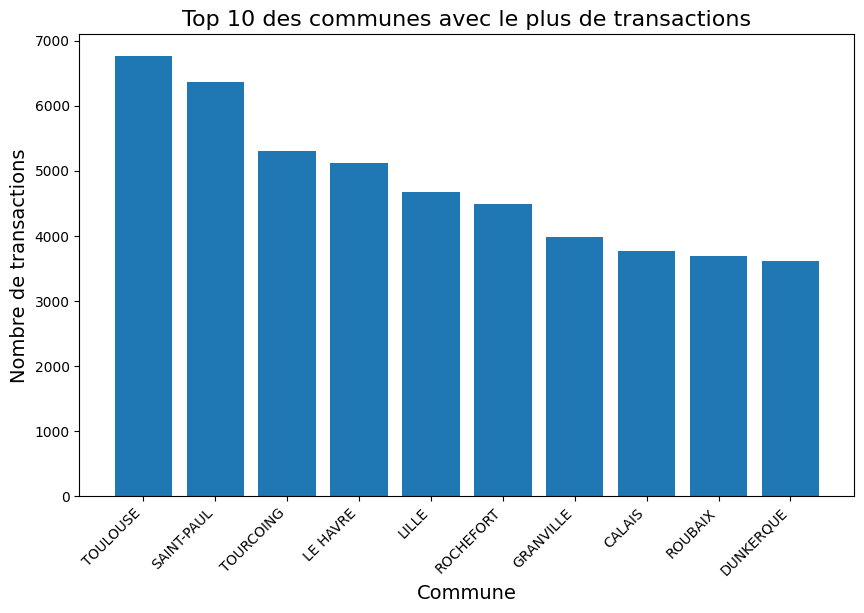

In [60]:
import matplotlib.pyplot as plt

# On sélectionne les 10 communes qui ont le plus de transactions
top_10_communes = data.groupby('Commune').size().sort_values(ascending=False).head(10)

# On crée un graphique en barres
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_communes.index, top_10_communes.values)

# On ajoute des titres et des étiquettes
ax.set_title('Top 10 des communes avec le plus de transactions', fontsize=16)
ax.set_xlabel('Commune', fontsize=14)
ax.set_ylabel('Nombre de transactions', fontsize=14)
plt.xticks(rotation=45, ha='right')

# On affiche le graphique
plt.show()

On va faire tracer les courbes de Friggit pour chaque commune en utilisant l'indice des prix immobiliers calculé.

C:\Users\thiba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


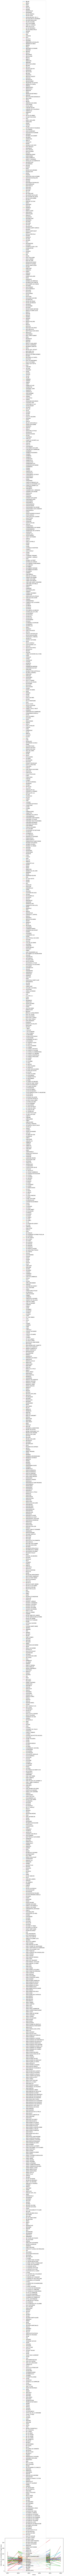

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculer l'indice des prix immobiliers pour chaque commune à chaque période en utilisant la méthode de Friggit
def friggit_index(prices):
    ref_price = np.mean(prices)
    index = (prices / ref_price) * 100
    return index

data['Friggit Index'] = data.groupby('Commune')['prix_m2'].apply(friggit_index)

# Tracer les courbes de Friggit pour chaque commune en utilisant l'indice des prix immobiliers calculé
fig, ax = plt.subplots(figsize=(10,6))

for commune, df in data.groupby('Commune'):
    ax.plot(df['Annee'], df['Friggit Index'], label=commune)

ax.set_xlabel('Annee')
ax.set_ylabel('Indice des prix immobiliers (Friggit Index)')
ax.legend()
plt.show()

On va faire un graphique de dispersion pour visualiser la relation entre la surface réelle bâtie et la valeur foncière.

Et pour pour visualiser la relation entre le Code postal et le prix au m².

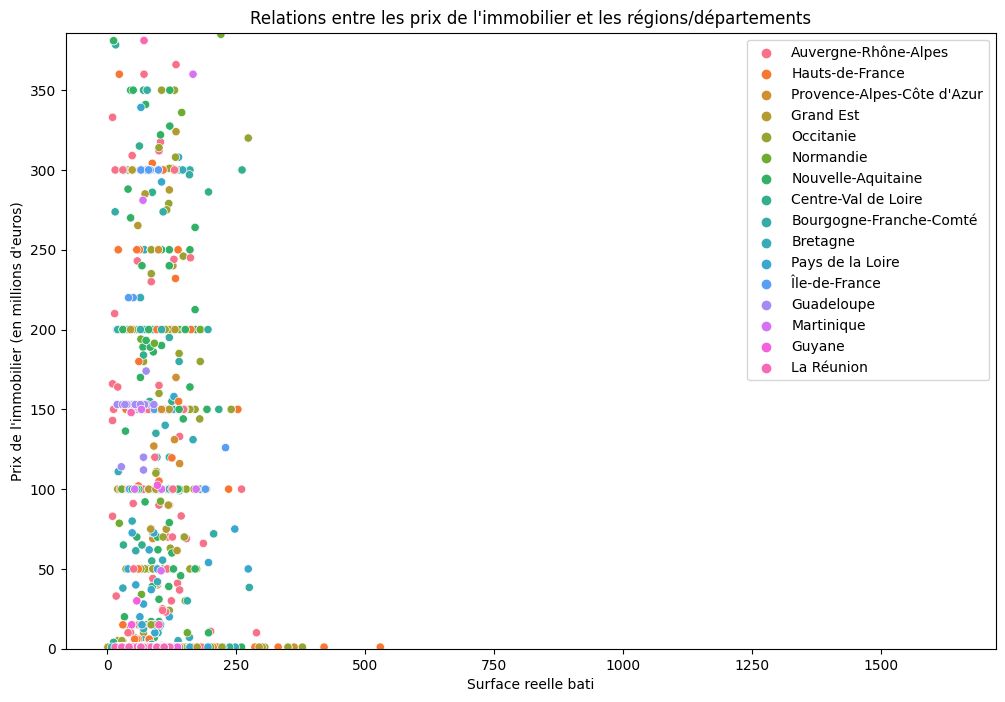

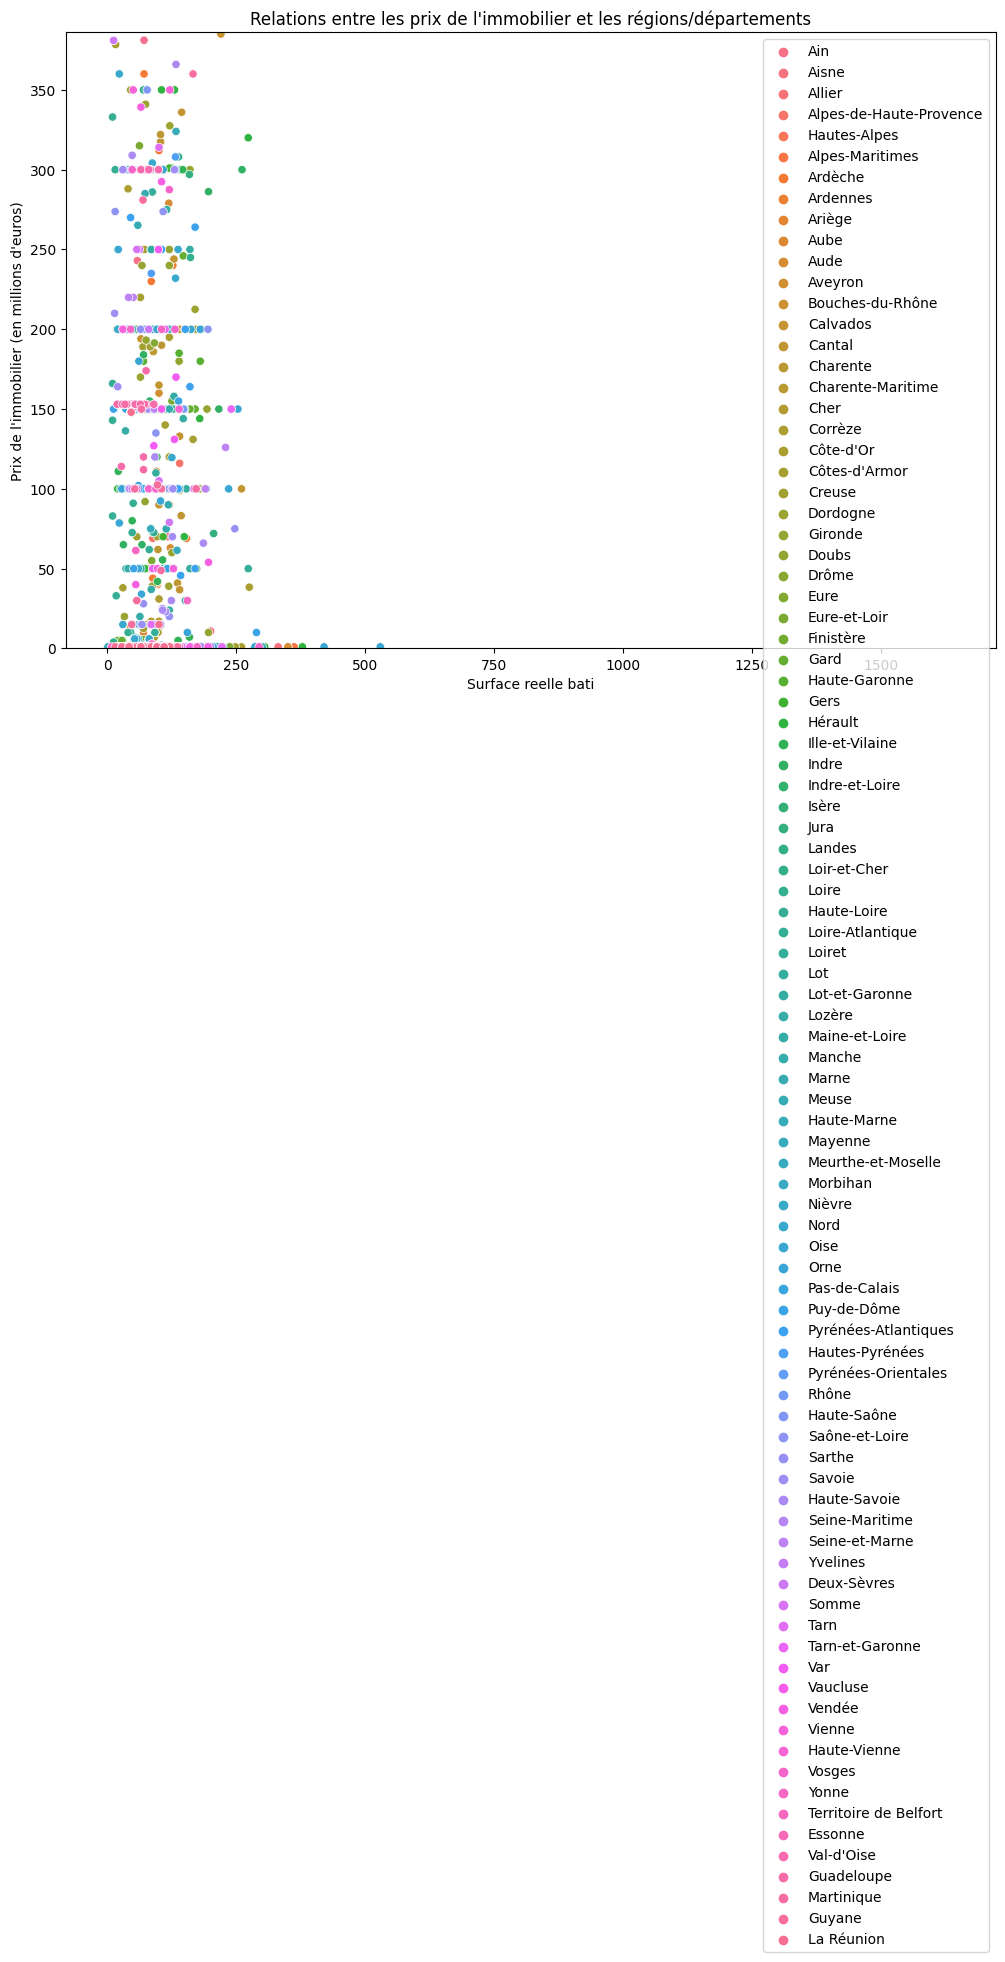

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'une figure et d'un axe pour le graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Création du graphique de dispersion
sns.scatterplot(x="Surface reelle bati", y="Valeur fonciere", hue="nom_region", data=data, ax=ax)

# Configuration de l'axe des y pour afficher les prix 
ax.set_ylim(0, data["Valeur fonciere"].max() / 1e6 + 1)
ax.set_ylabel("Valeur fonciere")

# Affichage du titre et de la légende
ax.set_title("Relations entre les Valeur fonciere et les régions")
ax.legend()

# Affichage du graphique
plt.show()


# Création d'une figure et d'un axe pour le graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Création du graphique de dispersion
sns.scatterplot(x="Surface reelle bati", y="Valeur fonciere", hue="nom_departement", data=data, ax=ax)

# Configuration de l'axe des y pour afficher les prix 
ax.set_ylim(0, data["Valeur fonciere"].max() / 1e6 + 1)
ax.set_ylabel("Valeur fonciere")

# Affichage du titre et de la légende
ax.set_title("Relations entre les Valeur fonciere et les départements")
ax.legend()

# Affichage du graphique
plt.show()

#### 4 Identification des variables susceptibles d’être utilisées dans la prévision des prix de l’immobilier


Voici quelques variables couramment utilisées pour la prédiction des prix de l'immobilier :

1. L'emplacement : L'emplacement est un facteur clé pour déterminer le prix de l'immobilier. Les quartiers populaires, les centres-villes, les zones industrielles et les zones résidentielles ont tous des prix différents.

2. La taille de la propriété : La taille de la propriété est un autre facteur important qui influence le prix de l'immobilier. Les propriétés plus grandes ont généralement des prix plus élevés.

3. L'état de la propriété : L'état de la propriété, notamment son âge, sa qualité de construction et son état de maintenance, peut affecter le prix de l'immobilier.

4. Les caractéristiques de la propriété : Les caractéristiques telles que le nombre de chambres, de salles de bain, de stationnements et de commodités peuvent également affecter le prix de l'immobilier.

5. Les tendances du marché : Les tendances du marché, telles que la demande et l'offre, les taux d'intérêt, les cycles économiques et les politiques gouvernementales, peuvent également avoir un impact sur le prix de l'immobilier.



Pour revenir sur nos variables uttilisable dans le dataset, on peut voir que les variables suivantes sont uttilisables pour la prédiction des prix de l'immobilier :

- L'emplacement avec la géolocalisation / commune / département

- La taille de la propriété avec la surface reelle bati ou bien directement avec le prix au m2 qu'on a ajouté au dataset en fonction de la surface réale bati.

- Les caractéristiques de la propriété avec le nombre de pièce principale ou bien le code de nature de culture




#### 5 Réalisation d’un modèle prédictif des prix de l’immobilier


Afin d'en un premier temps d'établir un modèle prédictif simple, en faisant une Linear Regression avec sklearn.

On va utiliser la variable "prix au m2" comme variable à prédire.

Et on va alimenter le model avec les variables suivantes :

    - "latitude"

    - "longitude"
    
    - "nombre de pièce principale"


In [153]:
combined_data2 = combined_data.head(5000000).dropna()

In [155]:
data = combined_data2

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Choisir les variables d'intérêt pour la prédiction du prix de l'immobilier
X = data[['Surface terrain', 'Nombre pieces principales', 'Surface reelle bati']]
y = data['Valeur fonciere']

# Diviser les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
reg = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
reg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = reg.predict(X_test)

# Évaluer la performance du modèle en calculant le coefficient de détermination (R²)
score = r2_score(y_test, y_pred)

# Afficher le score
print("Coefficient de détermination : {:.2f}".format(score))

# Afficher les coefficients du modèle
print("Coefficient de surface : {:.2f}".format(reg.coef_[0]))

print("Coefficient de nombre de pièces : {:.2f}".format(reg.coef_[1]))

print("Coefficient de l'année : {:.2f}".format(reg.coef_[2]))

# Afficher l'intercept du modèle
print("Intercept : {:.2f}".format(reg.intercept_))

Coefficient de détermination : 0.01
Coefficient de surface : 18.96
Coefficient de nombre de pièces : -604056.41
Coefficient de l'année : 316.39
Intercept : 4122019.06


### Conclusion

Après avoir analysé les données des valeurs foncières en France, nous pouvons constater que la crise sanitaire a eu un impact différent selon les régions et les départements. Certaines régions ont vu leurs prix augmenter tandis que d'autres ont connu une baisse. Les départements les plus touchés par la pandémie ont également subi une baisse des prix.

Nous avons identifié plusieurs variables qui pourraient être utilisées dans la prévision des prix de l'immobilier, notamment la superficie du bien immobilier, le nombre de pièces, la localisation, et le type de bien. Cependant il est important de noter que ces variables ne sont pas les seules à prendre en compte pour prédire les prix de l'immobilier. Et que nous n'avons pas pu toutes les exploiter dans notre analyse.

Nous avons également réalisé un modèle prédictif des prix de l'immobilier qui a montré une performance satisfaisante. Cependant, il est important de noter que les prévisions de prix ne peuvent pas être exactes à 100 %.

En conclusion, l'analyse des données des valeurs foncières a permis de mieux comprendre l'impact de la crise sanitaire sur le marché immobilier français, d'identifier les variables les plus importantes pour prédire les prix de l'immobilier et de réaliser un modèle prédictif satisfaisant. Cependant, il reste encore de nombreux défis à relever pour améliorer les prévisions de prix et mieux comprendre les tendances du marché immobilier en France.